# Load Libraries

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
#nltk.download()
import nltk
from collections import  Counter
import random
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re, string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

# Load File

In [153]:
file = pd.read_excel("../data/contract_new.xlsx")
file_pd = pd.DataFrame(file)

In [154]:
# Preview Dataframe

file_pd

,contract,content
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT THIS CO-...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMEN...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13 JOINT VENTURE AGREEMENT Collecti...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGRE...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.24B-...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAG...,REDACTED COPY CONFIDENTIAL TREATMENT REQUESTED...
...,...,...
505,ZEBRATECHNOLOGIESCORP_04_16_2014-EX-10.1-INTEL...,Exhibit 10.1 INTELLECTUAL PROPERTY AGREEMENT T...
506,ZogenixInc_20190509_10-Q_EX-10.2_11663313_EX-1...,Exhibit 10.2 CERTAIN INFORMATION (INDICATED BY...
507,ZONDWINDSYSTEMPARTNERSLTDSERIES85-B_04_03_2006...,Exhibit 10.17(b) ---------------- FIRST AMENDM...
508,"ZoundsHearing,Inc.-MANUFACTURINGDESIGNMARKETIN...","Exhibit 10.1 MANUFACTURING, DESIGN AND MARKETI..."


# Clean Dataframe

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. 

The following are the relevant steps needed to clean the data:
1. Unify text (small letter, white space)
2. Check for duplicates

## Create Functions

In [155]:
def lower_case(df):
  df['content'] = df['content'].str.lower()
  return df

In [156]:
def remove_space(df):
  df = df.replace(r'\n',' ', regex=True)
  df = df.replace(r'\n\n',' ', regex=True)
  df = df.replace(r'\\n',' ', regex=True)
  df = df.replace('\s+', ' ', regex=True)
  df['content'] = df['content'].str.strip(" ")
  
  return df


## Run Functions

In [157]:
file_clean = lower_case(file_pd)
file_clean = remove_space(file_clean)
file_clean.drop_duplicates(subset = ['content'], inplace = True)

In [158]:
# Preview cleaned dataframe

file_clean

,contract,content
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,co-branding and advertising agreement this co-...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMEN...,exhibit 4.25 information in this exhibit ident...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,exhibit 10.13 joint venture agreement collecti...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGRE...,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAG...,redacted copy confidential treatment requested...
...,...,...
505,ZEBRATECHNOLOGIESCORP_04_16_2014-EX-10.1-INTEL...,exhibit 10.1 intellectual property agreement t...
506,ZogenixInc_20190509_10-Q_EX-10.2_11663313_EX-1...,exhibit 10.2 certain information (indicated by...
507,ZONDWINDSYSTEMPARTNERSLTDSERIES85-B_04_03_2006...,exhibit 10.17(b) ---------------- first amendm...
508,"ZoundsHearing,Inc.-MANUFACTURINGDESIGNMARKETIN...","exhibit 10.1 manufacturing, design and marketi..."


# POS Tagging

## Create POS tagging function

In [159]:
def get_pos_tags(sentences, tagset='universal'):
    ''' Extract the part-of-speech taggings of the sentence
        Input:
        - sentence: string, sentence to tag
        - tagset: string, tagset or the set of tags to search for
    '''
    #Create the Dataframe to store the count of tags
    df = pd.DataFrame(columns=['ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X'])
    for sent in sentences:
        # Extract the part of Speech tags in the sentence
        pos_tags = Counter([j for i,j in nltk.pos_tag(word_tokenize(sent), tagset='universal')])
        #Appends the pos tags to the dataframe, fill NaN values with 0
        df = df.append(pos_tags, ignore_index=True).fillna(0)

    return df.astype(int)

In [160]:
# Identify the taggings for the text variable
contract_name = file_clean['contract'].values
df_contractn = get_pos_tags(contract_name)

# Identify the taggings for the summary variable
content = file_clean['content'].values
df_content = get_pos_tags(content)

In [161]:
df_content.head()

,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.,X
0,408,585,117,221,623,1462,194,171,46,685,725,0
1,346,595,103,275,558,1312,89,157,44,655,677,2
2,208,292,36,108,283,584,47,61,30,269,241,0
3,434,719,117,305,534,1749,136,237,50,768,614,2
4,368,494,100,226,405,1692,124,153,47,651,434,3


## Plot historgram to check the distribution

In [162]:
def plot_histograms(data, plot_vars, xlim, labels, figsize):
    ''' Function to plot the histograms of the variables in plot_vars
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - xlim: a list, define the max x value for every column to plot
        - labels: a dctionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    # Set some parameters
    kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2})

    cmap = get_cmap(plot_vars.shape[1])
    # Create the figure and axes
    fig, axes = plt.subplots(plot_vars.shape[0], plot_vars.shape[1], figsize=figsize, sharey=False, dpi=100)
    #For every variable in plot_vars
    for i in range(plot_vars.shape[1]):
        # Plot the histogram 
        sns.distplot(data[plot_vars[0,i]] , color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),), 
                     ax=axes[i], axlabel=labels[plot_vars[0,i]], bins= 50, norm_hist = True)
        #For a better visualization we set the x limit
        axes[i].set_xlim(left=0, right=xlim[i])
        
    fig.tight_layout()

In [163]:
# We declare a new dataframe for plotting porpouses
#data=dataset

# Create a dictionary to title the columns based on their names
labels_dict={'sum_word_count': 'Word Count of Summaries','text_word_count': 'Word Count of Texts',
             'sum_char_count': 'Char Count of Summaries','text_char_count': 'Char Count of Texts',
             'sum_word_density': 'Word Density of Summaries','text_word_density': 'Word Density of Texts',
             'sum_punc_count': 'Punctuation Count of Summaries','text_punc_count': 'Punctuation Count of Texts',
             'text_sent_count': 'Sentence Count of Texts', 'sum_sent_count': 'Sentence Count of Summaries',
             'text_sent_density': 'Sentence Density of Texts', 'sum_sent_density': 'Sentence Density of Summaries',
             'text_stopw_count': 'Stopwords Count of Texts', 'sum_stopw_count': 'Stopwords Count of Summaries',
             'ADJ': 'adjective','ADP': 'adposition', 'ADV': 'adverb','CONJ': 'conjunction',
             'DET': 'determiner','NOUN': 'noun', 'text_unknown_count': 'Unknown words in Texts',
             'sum_unknown_count': 'Unknown words in Summaries',}

## Contract Name POS Tagging

C:\Users\ivyha\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


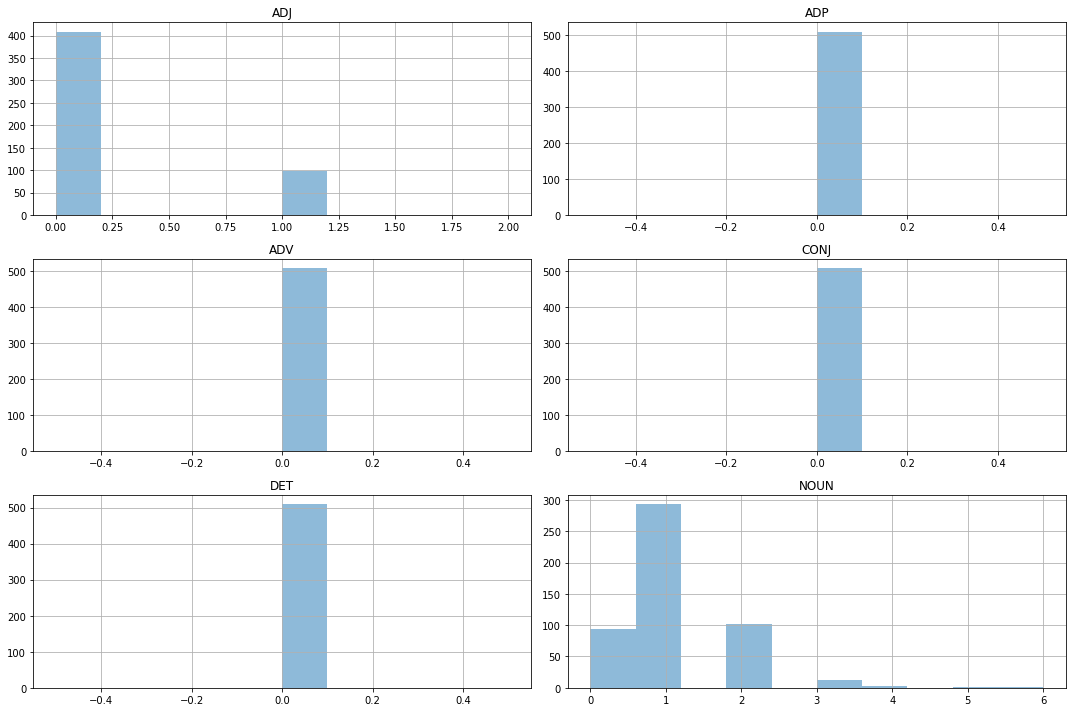

In [164]:
#content_unknown_count
df_contractn[['ADJ','ADP','ADV','CONJ','DET','NOUN']].hist(figsize = (15,10), layout = (3, 2), alpha=0.5)
plt.tight_layout()
plt.show()

### Contract Content POS Tagging

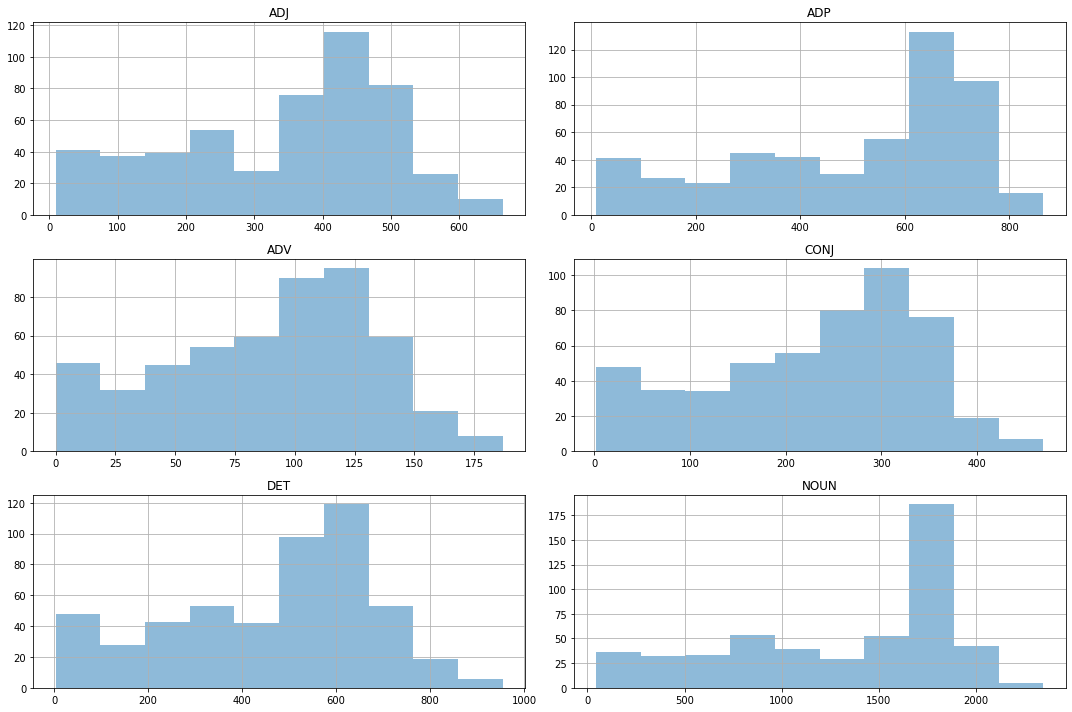

In [165]:
#content_unknown_count
df_content[['ADJ','ADP','ADV','CONJ','DET','NOUN']].hist(figsize = (15,10), layout = (3, 2), alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\ivyha\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ivyha\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ivyha\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

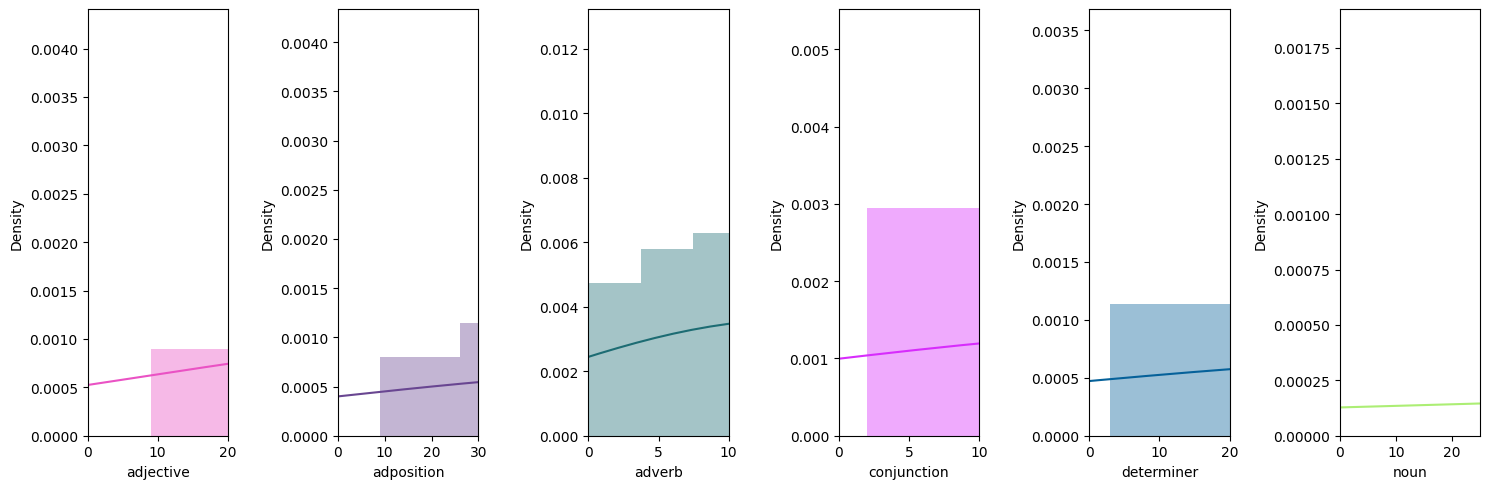

In [166]:
# Select the columns to plot: those related to pos taggings
plot_vars=np.array([['ADJ','ADP','ADV','CONJ','DET','NOUN']])

# Plot a histograms of the variables 
plot_histograms(df_content, plot_vars, [20, 30, 10, 10, 20, 25], labels_dict, figsize=(15,5))

# Check for Unknown words

## Create Functions

In [167]:
class GloveVectorizer:
  '''Class to store the vocabulary of our texts, including mappings between words and its integer representation. 
     It also contain the embeddings of the vocab to transform every token or integer value
  '''
  def __init__(self, embedding_file):
    ''' Build the embeddings, load them from a file and store it in a list of embedded vectors '''
    # load in pre-trained word vectors
    print('Loading word vectors...')
    word2vec = {}
    embedding = []
    idx2word = []
    with open(embedding_file, encoding='utf8') as f:
      # is just a space-separated text file in the format:
      # word vec[0] vec[1] vec[2] ...
      for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)
    print('Found %s word vectors.' % len(word2vec))

    # save for later
    self.word2vec = word2vec
    self.embedding = np.array(embedding)
    self.word2idx = {v:k for k,v in enumerate(idx2word)}
    self.V, self.D = self.embedding.shape

  def fit(self, data):
    pass

  def transform(self, data):
    ''' Include the tokens contained in the data in the vocabulary'''
    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    # For every sentence in the data
    for sentence in data:
      tokens = sentence.lower().split() # Extract the words
      vecs = []
      unknowns=0
      # For every word in the setence
      for word in tokens:
        # Include the embedded word in the output list 
        if word in self.word2vec:
          vec = self.word2vec[word]
          vecs.append(vec)
        else:
          unknowns += 1  
      # Calculate the embedding of a data as the mean of the embeddings of every word 
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    #print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X

  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [168]:
def replace_punctuation(text, punctuation):
    ''' Replace punctuation with whitespace'''
    table=str.maketrans(punctuation, ' '*len(punctuation))
    return text.translate(table)

def unknown_words(text, vocab):
    ''' Return the unknow words found in the text, those not found in the embeddings '''
    tokens = word_tokenize(text)
    unknown = [t for t in tokens if t not in vocab.word2vec]
    
    return unknown

## Run functions

In [169]:
# Set the filename containing the embeddings
glove_file = 'glove.6B.100d.txt'
glove_filename = os.path.join("", glove_file)

#Load the Glove embeddings
vectorizer = GloveVectorizer(glove_filename)

Loading word vectors...
Found 400000 word vectors.


In [170]:
# Clean the content to tokenize and extract the unknown words
file_clean['contract_unknown_words'] = file_clean['contract'].apply(lambda x : replace_punctuation(x.lower(), string.punctuation))
file_clean['contract_unknown_words'] = file_clean['contract_unknown_words'].apply(lambda x : unknown_words(x, vectorizer))
# Count the ocurrencies of unknown words in the summary
file_clean['contract_unknown_count'] = file_clean['contract_unknown_words'].apply(lambda x : len(x))

In [171]:
# Clean the text to tokenize and extract the unknown words
file_clean['content_unknown_words'] = file_clean['content'].apply(lambda x : replace_punctuation(x.lower(), string.punctuation))
file_clean['content_unknown_words'] = file_clean['content_unknown_words'].apply(lambda x : unknown_words(x, vectorizer))
# Count the ocurrencies of unknown words in the text
file_clean['content_unknown_count'] = file_clean['content_unknown_words'].apply(lambda x : len(x))

In [172]:
# Extract the descriptive statistics for the summary variable
file_clean[['contract_unknown_count', 'content_unknown_count']].describe()

,contract_unknown_count,content_unknown_count
count,509.000000,509.000000
mean,2.836935,46.070727
std,1.188417,53.077040
min,1.000000,0.000000
25%,2.000000,10.000000
50%,2.000000,23.000000
75%,4.000000,64.000000
max,8.000000,304.000000


In [173]:
file_clean[['contract_unknown_count']]

,contract_unknown_count
0,5
1,2
2,2
3,2
4,2
...,...
505,2
506,4
507,2
508,2


## Examples of some unknown word

In [174]:
print('Unknown words: ', file_clean['content_unknown_words'].values[5])
print('Unknown words: ', file_clean['content_unknown_words'].values[50])
print('Unknown words: ', file_clean['content_unknown_words'].values[100])

Unknown words:  ['77030', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'ox14', '4ry', 'adaptimmune', 'adaptimmune', 'witnesseth', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'mdacc', 'workscope', 'workscope', 'adaptimmune', 'workscope', 'workscope', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', '6002', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'workscope', 'workscope', 'adaptimmune', 'workscope', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', '§', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'adaptimmune', 'worksc

## Plot histogram to observe distribution of unknown words

C:\Users\ivyha\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


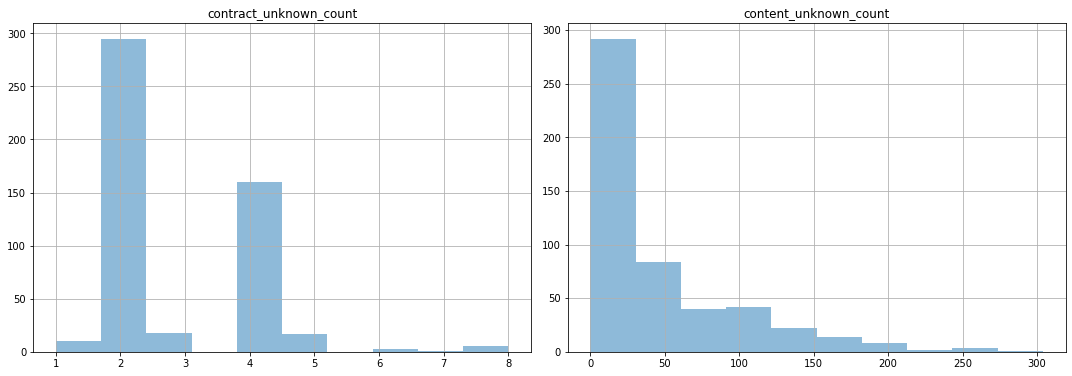

In [175]:
file_clean[['contract_unknown_count','content_unknown_count']].hist(figsize = (15,15), layout = (3, 2), alpha=0.5)
plt.tight_layout()
plt.show()

# Stops Words and Punctuations

In [176]:
stopwords = nltk.corpus.stopwords.words('english')
#Define some global variables for text processing
punc = string.punctuation

def count_stopwords(text, stopwords):
    ''' Return the number of stopwords in the text
        Input:
            - text: string
            - stopwords: list of string, containing the stopwords
        Output:
            - int, number of stopwords in the text argument
    '''
    word_tokens = word_tokenize(text) #splitta i pezzi
    stopwords_x = [w for w in word_tokens if w in stopwords]
    
    return len(stopwords_x)

In [177]:
# Create a new variable containing the number of stopwords in the text
file_clean['content_stopw_count'] =  file_clean['content'].apply(lambda x : count_stopwords(x, stopwords))
# Create a new variable containing the number of stopwords in the summary
file_clean['contract_stopw_count'] =  file_clean['contract'].apply(lambda x : count_stopwords(x, stopwords))

# Create a new variable containing the number of punctuations in the text
file_clean['content_punc_count'] = file_clean['content'].apply(lambda x : len([a for a in x if a in punc]))
# Create a new variable containing the number of punctuations in the summary
file_clean['contract_punc_count'] = file_clean['contract'].apply(lambda x : len([a for a in x if a in punc]))

In [178]:
def plot_boxplots(data, plot_vars, labels, figsize):
    ''' Plot a box-plot of the variables in the plot_vars list using the labels and a size of figesize
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - labels: a dctionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    
   # We need to identify is this a matrix or a vector
    if plot_vars.ndim == 1:
        nrows=1
        ncols = plot_vars.shape[0]
    else:
        nrows= plot_vars.shape[0]
        ncols = plot_vars.shape[1]

    #Create a figure and its axes for the dimensions defined
    f, axes = plt.subplots(nrows, ncols, sharey=False, figsize=(15,5))
    #For every variable in the plot_vars
    for i in range(nrows):
        for j in range(ncols):
            # If the column name is defined we plot it
            if plot_vars[i,j]!=None:
                if axes.ndim>1:
                    #Set the title
                    axes[i,j].set_title(labels[plot_vars[i,j]])
                    axes[i,j].grid(True)
                    #Set x ticks
                    axes[i,j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[i,j].boxplot(data[plot_vars[i,j]])
                else:
                    #Set the title
                    axes[j].set_title(labels[plot_vars[i,j]])
                    axes[j].grid(True)
                    #Set x ticks
                    axes[j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[j].boxplot(data[plot_vars[i,j]])
                
            else:
                axes[i,j].set_visible(False)
    # Adjust the plots for a better visualization
    f.tight_layout()
    plt.show() 


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_histograms(data, plot_vars, xlim, labels, figsize):
    ''' Function to plot the histograms of the variables in plot_vars
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - xlim: a list, define the max x value for every column to plot
        - labels: a dctionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    #Set some parameters
    kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2})

    #cmap = get_cmap(plot_vars.shape[1])
    # Create the figure and axes
    fig, axes = plt.subplots(plot_vars.shape[0], plot_vars.shape[1], figsize=figsize, sharey=False, dpi=100)
    #For every variable in plot_vars
    for i in range(plot_vars.shape[1]):
        # Plot the histogram 
        sns.distplot(data[plot_vars[0,i]] , color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),), 
                     ax=axes[i], axlabel=labels[plot_vars[0,i]], bins= 50, norm_hist = True)
        #For a better visualization we set the x limit
        axes[i].set_xlim(left=0, right=xlim[i])
        
    fig.tight_layout()

<AxesSubplot:>

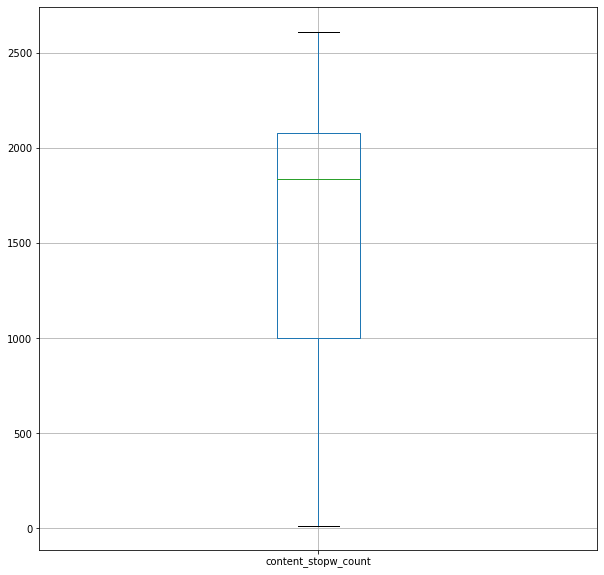

In [179]:
file_clean.boxplot(column = ['content_stopw_count'], figsize = (10,10))



<AxesSubplot:>

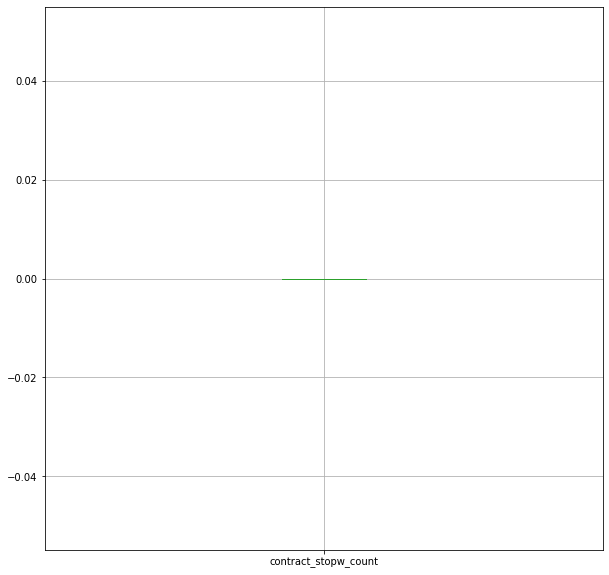

In [180]:
file_clean.boxplot(column = ['contract_stopw_count'], figsize = (10,10))


<AxesSubplot:>

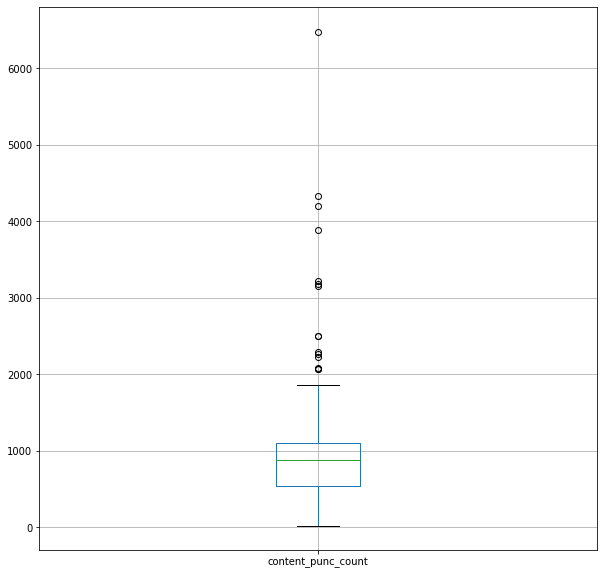

In [181]:
file_clean.boxplot(column = ['content_punc_count'], figsize = (10,10))

<AxesSubplot:>

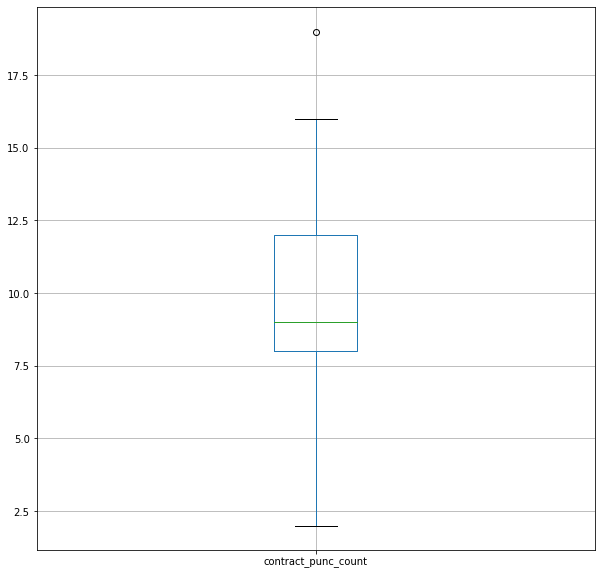

In [182]:

file_clean.boxplot(column = ['contract_punc_count'], figsize = (10,10))

# Remove Punctuation and stopwords

In [183]:
def clean_text(text, stopwords):
    ''' Apply some basic techniques for cleaning a text for an analysis of words
    
    Input:
       - text: text to be cleaned
    Output:
       - result: cleaned text
    '''
    # Lowercase the text
    text = text.lower()
    # Remove any  non-alphabet characters including digits
    pattern =  r'[^a-zA-Z\s]'    
    text = re.sub(pattern, '', text)
    # Remove punctuation
    #table=str.maketrans('','',string.punctuation)
    #text = text.translate(table)
    # Remove the stopwords    
    tokens = nltk.word_tokenize(text)    
    tokens = [token.strip() for token in tokens]    
    text = ' '.join([token for token in tokens if token not in stopwords])
    return text

In [184]:
c_contract = []
c_content = []

for index,row in file_clean.iterrows():
    c_contract.append(clean_text(row['contract'], stopwords))
    c_content.append(clean_text(row['content'], stopwords))
    #print(clean_text(row['contract'], stopwords))

#file_new2 = pd.DataFrame()
file_clean['contract_clean'] = c_contract
file_clean['content_clean'] = c_content

In [185]:
file_clean

,contract,content,contract_unknown_words,contract_unknown_count,content_unknown_words,content_unknown_count,content_stopw_count,contract_stopw_count,content_punc_count,contract_punc_count,contract_clean,content_clean
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,co-branding and advertising agreement this co-...,"[2themartcominc, 19990826, 6700288, brandingag...",5,"[94402, 2themart, 18301, 92612, 2themart, 2the...",86,1794,0,990,14,themartcomincgexexcobrandingagreementagencyagr...,cobranding advertising agreement cobranding ad...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICESAGREEMEN...,exhibit 4.25 information in this exhibit ident...,"[abilityinc, servicesagreement]",2,"[telcostar, setoff, esign, docusign, telcostar...",12,1825,0,821,8,abilityincexservicesagreementtxt,exhibit information exhibit identified confide...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,exhibit 10.13 joint venture agreement collecti...,"[acceleratedtechnologiesholdingcorp, jointvent...",2,"[ccgi, pvss, mightycell, mightycell, 18901, pv...",18,863,0,488,8,acceleratedtechnologiesholdingcorpexjointventu...,exhibit joint venture agreement collectible co...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTORAGRE...,exhibit 10.31 pursuant to 17 c.f.r. § 240.24b-...,"[accurayinc, distributoragreement]",2,"[§, accuray, accuray, 94089, accuray, accuray,...",176,2100,0,903,8,accurayincexdistributoragreementtxt,exhibit pursuant cfr b confidential informatio...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENTAG...,redacted copy confidential treatment requested...,"[adamsgolfinc, endorsementagreement]",2,"[witnesseth, spga, proration, spga, spga, spga...",14,1439,0,1124,8,adamsgolfincexendorsementagreementtxt,redacted copy confidential treatment requested...
...,...,...,...,...,...,...,...,...,...,...,...,...
505,ZEBRATECHNOLOGIESCORP_04_16_2014-EX-10.1-INTEL...,exhibit 10.1 intellectual property agreement t...,"[zebratechnologiescorp, intellectualpropertyag...",2,"[§101, §101, reexaminations, reissuances, subl...",25,2075,0,1628,8,zebratechnologiescorpexintellectualpropertyagr...,exhibit intellectual property agreement intell...
506,ZogenixInc_20190509_10-Q_EX-10.2_11663313_EX-1...,exhibit 10.2 certain information (indicated by...,"[zogenixinc, 20190509, 11663313, distributorag...",4,"[zogenix, shinyaku, 105216871, zogenix, noncli...",107,1809,0,1471,12,zogenixincqexexdistributoragreementtxt,exhibit certain information indicated asterisk...
507,ZONDWINDSYSTEMPARTNERSLTDSERIES85-B_04_03_2006...,exhibit 10.17(b) ---------------- first amendm...,"[zondwindsystempartnersltdseries85, management...",2,"[toyowest, sp11, sp12, sp13, sp14, sp21, toyow...",13,442,0,1330,8,zondwindsystempartnersltdseriesbexmanagementan...,exhibit b first amendment sagebrush management...
508,"ZoundsHearing,Inc.-MANUFACTURINGDESIGNMARKETIN...","exhibit 10.1 manufacturing, design and marketi...","[zoundshearing, manufacturingdesignmarketingag...",2,"[innerscope, cancellable, nonconformities, mer...",6,1955,0,872,4,zoundshearingincmanufacturingdesignmarketingag...,exhibit manufacturing design marketing agreeme...
